<a href="https://colab.research.google.com/github/Mar1nes/Studying/blob/master/Permutation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Описание исследования**

*Задача*: 

Есть данные о времени посещения двух веб-старниц (данные взяты с GoogleAnalytics), на которых размещены презентации, посвященные одному и тому же проудкту. Требуется выяснить какая презентация способствует повышению конверсии.

Ссылка на данные: 
https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/data/web_page_data.csv

*Исследование:*

Продукт дорогостоющийи и данных о продажах мало, поэтому в качестве эрзац-переменной было взято среднее время, которое проводят на странице случайные пользователи. Логично предположить, что чем больше среднее время, которое пользователи проводят на странице, чем выше вероятность продажи. По результатам исследования выяснилось, что из 36 посещений, 21 раз была отражена страница "A" и 15 раз - старница "B", пользователи в среднем проводили больше времени на старнице "B" и разница между средним временем посещения составляет 21.4 сек. Однако по результатм перестановочного теста было вяснено что эта разница с высокой долей вероятностью была пораждена случайностью. По результатам перестановочного теста было выявлено, что полученное значение разницы 21.4 сек лежит глубоко в перестановочном распределении (см. гистограмму) и, следовательно, результат не является статистически значимым, т.е. с высокой долей вероятности он поражден случайностью.

*Вывод:*

На основании полученных данных пока рано судить о том какая из презентаций результативнее. Рекомендуются накопить больше данных и повторить исследование.

THE DATA: (36 records)
     Page  Time
0  Page A  0.21
1  Page B  2.53
2  Page A  0.35
3  Page B  0.71
4  Page A  0.67 

BOX PLOTS: The difference between means spent time: 21.4 sec 



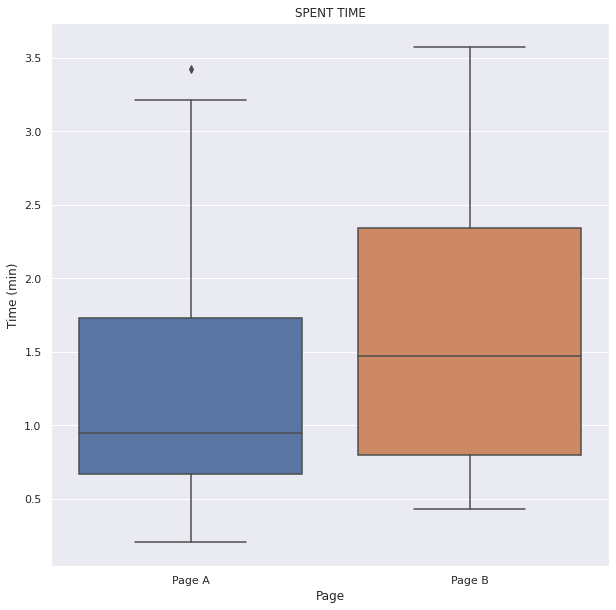

RANDOMIZE PERMUTATION TEST:


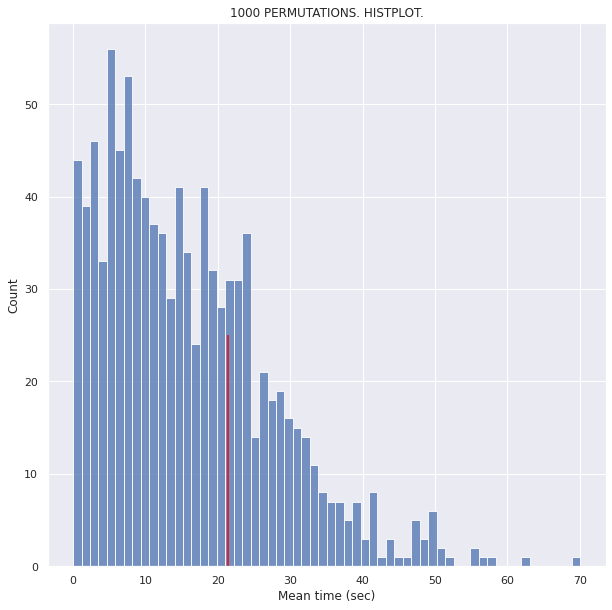

PERMUTATION TEST RESULT:
The Difference (21,4 sec) is deep in the permutation distribution.
Therefore this result due to chance with high degree of probability. 



In [16]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# read data
df = pd.read_csv('/content/web_pages_data.csv', sep=',', skiprows=8, header=None) 
df.rename(columns={0:'Page', 1:'Time'}, inplace=True)  # rename columns

time = np.array(df['Time']) # value type in column "Time" is string
time_to_float = []

# remove extra characters and cast n to float
for n in time:
    n = n.replace('\\','')
    n = n.replace('}','')
    n = float(n)
    time_to_float.append(n)
  
df['Time'] = time_to_float

# THE DATA
print(f'THE DATA: ({len(df)} records)')
print(df.head(), '\n')

# Separate df -> Page "A" & Page "B"
A = df[df['Page']=='Page A']
B = df[df['Page']=='Page B']

nA = len(A)
nB = len(B)

# Calculate difference between mean visiting time of Page "A" & Page "B"
meanA = np.mean(A['Time'])
meanB = np.mean(B['Time'])
difference = np.absolute((meanA-meanB)*60).round(2)

# Draw Boxplots
print(f'BOX PLOTS: The difference between means spent time: {difference} sec', '\n')
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Page'], y=df['Time'])
plt.ylabel('Time (min)')
plt.title('SPENT TIME')
plt.show()

# PERMURARTION TEST
# Generating samples with same length of pages A & B and calculating difference 
# between means of this samples x R times. Samples whithout replace.
R = 1000
permutation_means = []
for i in range(R):
    smplA = df.sample(nA, replace=False)
    indexes = df.index.delete(smplA.index)
    smplB = df.iloc[indexes]
    m1 = float(np.mean(smplA['Time']))
    m2 = float(np.mean(smplB['Time']))
    permutation_means.append((np.abs(m1-m2)*60).round(2))

print('RANDOMIZE PERMUTATION TEST:')

# Draw histplot
plt.figure(figsize=(10,10))
plt.vlines(x=difference, ymin=0, ymax=25, colors='Red')
sns.histplot(x=permutation_means, bins=60)
plt.xlabel('Mean time (sec)')
plt.title(f'{R} PERMUTATIONS. HISTPLOT.')
plt.show()

# Output
print('PERMUTATION TEST RESULT:')
print('The Difference (21,4 sec) is deep in the permutation distribution.')
print('Therefore this result due to chance with high degree of probability.','\n')
